## Import Library

In [1]:
from numpy.random import seed
seed(888)

In [153]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

## Constants

In [86]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000

NR_CLASSES =10

## Gather the Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(x_train_all)

numpy.ndarray

## Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

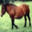

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

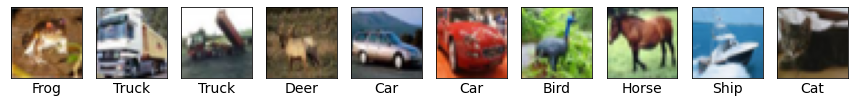

In [10]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [11]:
x_train_all[0].shape # width, height, 3child=RGB

(32, 32, 3)

In [12]:
nr_images,x,y,c= x_train_all.shape #50000 images
print(f'images = {nr_images} \t| width={x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width=32 	| height = 32 	| channels = 3


In [13]:
x_test.shape

(10000, 32, 32, 3)

## Process Data

In [14]:
x_train_all[0][0][0] #RGB

array([59, 62, 63], dtype=uint8)

In [15]:
x_train_all , x_test = x_train_all / 255.0, x_test /255.0 # normalize 0-1

In [16]:
x_train_all[0][0][0][0]

0.23137254901960785

In [17]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS) #32*32*3

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [20]:
# Data = Training + Validation + Testing
x_val = x_train_all[:VALIDATION_SIZE] #first 10k
y_val = y_train_all[:VALIDATION_SIZE]

In [21]:
x_val.shape

(10000, 3072)

In [22]:
x_train = x_train_all[VALIDATION_SIZE:] #after 10k = 40k
y_train = y_train_all[VALIDATION_SIZE:]

In [23]:
x_train.shape

(40000, 3072)

## Neural Network using Keras

In [45]:
# Multilayer Perceptron

model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])


model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(units=128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


## Tensorboard

In [28]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

## Fit the Model

In [29]:
samples_per_batch = 1000

In [48]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size = samples_per_batch, epochs = nr_epochs, callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 11min 29s


In [49]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size = samples_per_batch, epochs = nr_epochs, callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 21min 1s


In [50]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size = samples_per_batch, epochs = nr_epochs, callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 7h 8min 2s
Parser   : 466 ms


## Predictions on Individual Images

In [52]:
x_val.shape

(10000, 3072)

In [53]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [54]:
model_2.predict(test)

array([[8.2522640e-03, 1.6091970e-03, 8.7827474e-02, 6.8081602e-02,
        9.1437235e-02, 3.6435775e-02, 6.5640056e-01, 4.9432043e-02,
        4.2552278e-05, 4.8130163e-04]], dtype=float32)

In [56]:
model_2.predict(x_val).shape

(10000, 10)

In [57]:
model_2.predict_classes(test)

C:\Users\Admin\ana3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6], dtype=int64)

In [58]:
y_val[0]

array([6], dtype=uint8)

In [71]:
for i in range(10):
    test_img = np.expand_dims(x_val[i], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[i][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 9
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 4
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


## Evaluation

In [136]:
model_2.metrics_names

['loss', 'accuracy']

In [137]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 3s 8ms/step - loss: 1.4221 - accuracy: 0.4972
Test loss is 1.42 and test accuracy is 49.7%


### Confusion Matrix

In [138]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

In [156]:
conf_matrix

array([[462,  27,  92,  26,  61,  19,  34,  44, 187,  48],
       [ 34, 542,  15,  20,  19,  24,  31,  34,  89, 192],
       [ 53,  12, 302,  76, 215,  66, 157,  88,  19,  12],
       [ 15,   7,  71, 296,  67, 169, 220,  88,  33,  34],
       [ 31,   5, 108,  43, 474,  40, 163, 105,  22,   9],
       [  8,   6,  82, 185,  79, 375, 139,  84,  23,  19],
       [  2,   7,  41,  62, 105,  33, 705,  17,  15,  13],
       [ 24,   9,  50,  52,  97,  75,  44, 600,  18,  31],
       [ 69,  38,  19,  25,  33,  40,  15,  20, 666,  75],
       [ 30, 148,  14,  32,  15,  26,  41,  60,  84, 550]], dtype=int64)

In [139]:
conf_matrix.shape

(10, 10)

In [140]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [141]:
conf_matrix.max()

705

In [142]:
conf_matrix.min()

2

In [143]:
conf_matrix[0]

array([462,  27,  92,  26,  61,  19,  34,  44, 187,  48], dtype=int64)

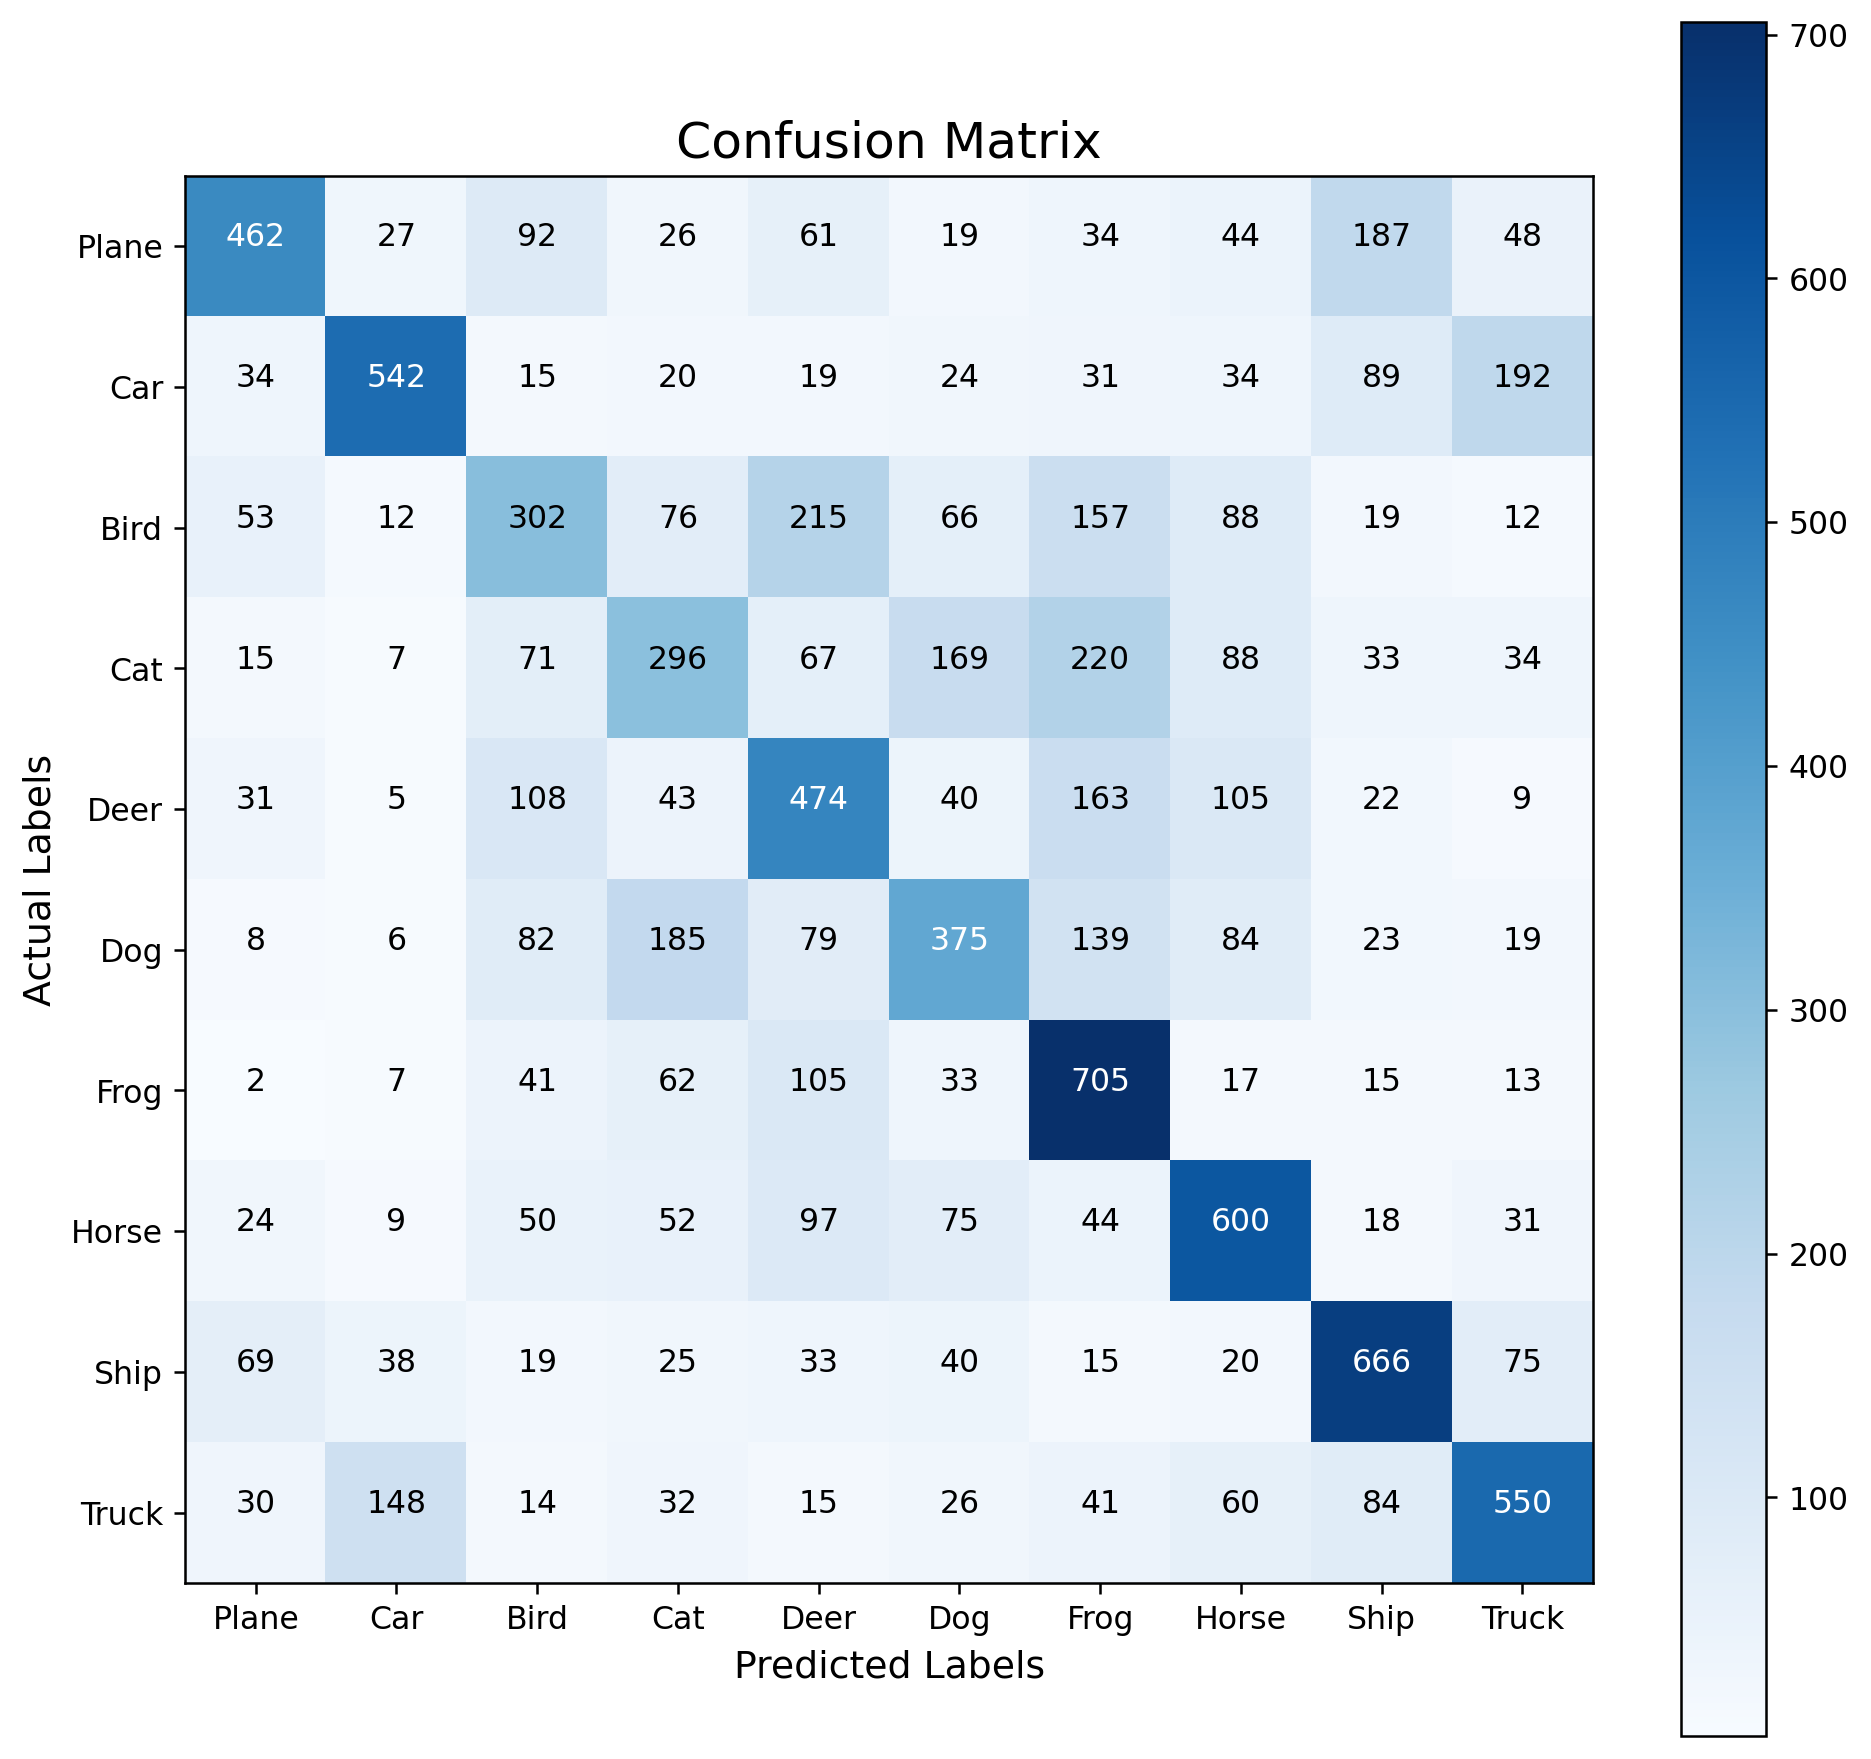

In [144]:
plt.figure(figsize=(10,10), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)


tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment= 'center', color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')
    
plt.show()

In [145]:
# True Positives
np.diag(conf_matrix)

array([462, 542, 302, 296, 474, 375, 705, 600, 666, 550], dtype=int64)

In [146]:
recall_score = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall_score

array([0.462, 0.542, 0.302, 0.296, 0.474, 0.375, 0.705, 0.6  , 0.666,
       0.55 ])

In [147]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.63461538, 0.67665418, 0.38035264, 0.3623011 , 0.40686695,
       0.43252595, 0.45513234, 0.52631579, 0.57612457, 0.5595117 ])

In [154]:
avg_recall_score = np.mean(recall_score)
print(f'Model 2 recall score is {avg_recall_score:0.2%}')

Model 2 recall score is 49.72%


In [155]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:0.2%}')

f1_score = 2 * (avg_precision * avg_recall_score) / (avg_precision + avg_recall_score)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 50.10%
Model 2 f score is 49.91%
